<a href="https://colab.research.google.com/github/annefrancine/ML_2022-2023/blob/main/S%C3%A9lection_de_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Il s'agit d'une base de données pour travailler avec la classification, où l'objectif est de prédire, à travers certaines caractéristiques, si une personne est diabétique ou non.

La description des champs est la suivante :

* preg = Number of times pregnant

* plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

* pres = Diastolic blood pressure (mm Hg)

* skin = Triceps skin fold thickness (mm)

* test = 2-Hour serum insulin (mu U/ml)

* mass = Body mass index (weight in kg/(height in m)^2)

* pedi = Diabetes pedigree function

* age = Age (years)

* class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [ ]:
#charger les packages
import pandas as pd
import numpy as np

colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [ ]:
# lire le dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', names=colnames)

In [ ]:
# Afficher les 5 lignes du dataset
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#informations du dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#division des données
X = df.drop(['class'], axis=1)
y = df['class']

In [ ]:
X

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

## Tests statistiques

Ils peuvent être utilisés pour sélectionner des attributs qui ont une forte relation avec la variable que nous essayons de prédire.

**Méthodes**

* f_classif: il convient lorsque les données sont numériques et que la variable cible est catégorielle.

* mutual_info_classif: il est plus adapté lorsqu'il n'y a pas de dépendance linéaire entre les caractéristiques et la variable cible.

* f_regression : appliqué aux problèmes de régression

Scikit-learn fournit la fonction SelectkBest() qui peut être utilisée avec divers tests statistiques. Pour le paramètre k, on renseigne le nombre de ressources à sélectionner comme les plus importantes.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html



In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
f_classif = SelectKBest(score_func=f_classif, k=4)
fit = f_classif.fit(X,y)
features = fit.transform(X)

# Visualiser les features:
print(features)

[[  6.  148.   33.6  50. ]
 [  1.   85.   26.6  31. ]
 [  8.  183.   23.3  32. ]
 ...
 [  5.  121.   26.2  30. ]
 [  1.  126.   30.1  47. ]
 [  1.   93.   30.4  23. ]]


Selon f_classif, ce sont les 4 caractéristiques qui ont obtenu le score le plus élevé. Voyons quelles sont ces caractéristiques.

In [ ]:
cols = fit.get_support(indices=True)
df.iloc[:,cols]

,preg,plas,mass,age
0,6,148,33.6,50
1,1,85,26.6,31
2,8,183,23.3,32
3,1,89,28.1,21
4,0,137,43.1,33
...,...,...,...,...
763,10,101,32.9,63
764,2,122,36.8,27
765,5,121,26.2,30
766,1,126,30.1,47


Chi carré

Mesure la dépendance entre les variables stochastiques, l'utilisation de cette fonction « élimine » les caractéristiques les plus susceptibles d'être indépendantes de la classe et donc non pertinentes pour la classification.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html


**Normalement utilisé lorsque nous avons des caractéristiques catégorielles et une variable cible catégorielle.**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction
test = SelectKBest(chi2, k=4)
fit = test.fit(X, y)
features = fit.transform(X)

In [ ]:
# Visualiser les features:
print(features)

[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 ...
 [121.  112.   26.2  30. ]
 [126.    0.   30.1  47. ]
 [ 93.    0.   30.4  23. ]]


In [ ]:
fit.get_support(indices=True)
np.array([1, 4, 5, 7])

cols = fit.get_support(indices=True)
df.iloc[:,cols]

,plas,test,mass,age
0,148,0,33.6,50
1,85,0,26.6,31
2,183,0,23.3,32
3,89,94,28.1,21
4,137,168,43.1,33
...,...,...,...,...
763,101,180,32.9,63
764,122,0,36.8,27
765,121,112,26.2,30
766,126,0,30.1,47


## Feature Importance

Des méthodes d'ensemble telles que l'algorithme Random Forest peuvent être utilisées pour estimer l'importance de chaque attribut. Il renvoie un score pour chaque attribut, plus le score est élevé, plus l'importance de cet attribut est grande.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.1102783  0.23202321 0.09934799 0.07900329 0.07782872 0.14356393
 0.11846663 0.13948793]


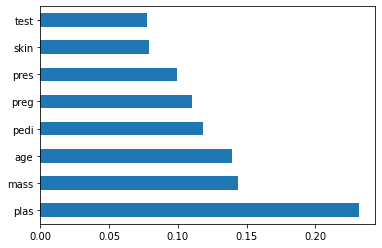

In [ ]:
#feature_importances of tree based classifiers

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# feature extraction
model = RandomForestClassifier(n_estimators=10)
model.fit(X, y)
RandomForestClassifier()

RandomForestClassifier()

In [ ]:
print(model.feature_importances_)

[0.0763788  0.2712426  0.09484826 0.06580822 0.06111505 0.18735279
 0.10540035 0.13785393]


In [ ]:
colnames

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [ ]:
# créer un dataframe avec les colonnes et scores
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances


,importance
plas,0.271243
mass,0.187353
age,0.137854
pedi,0.105400
pres,0.094848
preg,0.076379
skin,0.065808
test,0.061115


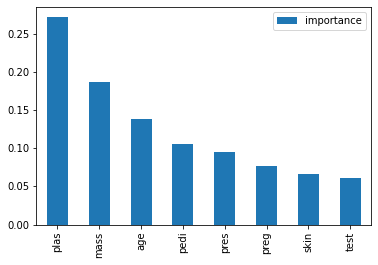

In [ ]:
# Visualiser les features
feature_importances.plot(kind='bar');